### Installations

In [43]:
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install imblearn
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 3.0 MB/s eta 0:00:01     |██████████████▋                 | 4.3 MB 2.8 MB/s eta 0:00:02
     |████████████████████████████████| 231 kB 1.8 MB/s eta 0:00:01


### Imports

In [44]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import imblearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Styling
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Loading the data
The data I retrieved contains 520 rows and 17 columns, the 17 columns are different features or symptoms of a diabetic, and the dataset is a collection of 520 people.

### Insight

Because the data doesn't have many attributes with too many columns, e.g. multivalued attrbitues, I don't need to do any reduction which would mean dividing up the values in multivalued attributes

In [3]:
# loading data from Amazon SW3 Bucket
data = pd.read_csv('https://diabetes-data-mka.s3.eu-west-2.amazonaws.com/diabetes_data_upload.csv', header=0)

# removing any null attributes
data = data.dropna()

# display some information about the data for a better understanding
print(data.shape)
print(list(data.columns))

# gives you the first 5 rows entries in dataset
data.head()

(520, 17)
['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'y']


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,y
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Data Exploration through visualization
I use seaborn to display a bar chart of the number of people in the table who actually have diabetes and who don't, despite the symptoms they have.

### Insight

The number of people who are positive with diabetes is almost double that of negative, so our dataset is imbalanced. We must do something to balance the data out!

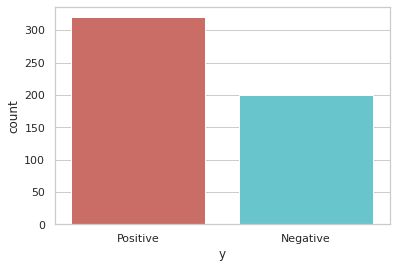

<Figure size 432x288 with 0 Axes>

In [4]:
# data is loaded as a numpy array so it as properties such as value_counts, see spec
data['y'].value_counts()
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

Before I can balance the dataset, I must change the labels so they're binary rather than strings of 'Positive' and 'Negative'. I also do this for the 'Yes' and 'No' indications of symptoms in the table. (Have a look at the final column 'y' and the display of the data above)

In [5]:
data.y.replace(('Positive', 'Negative'), (1, 0), inplace=True)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,y
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1


In [6]:
data.replace('Yes', 1, inplace=True)
data.replace('No', 0, inplace=True)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,y
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [7]:
# data[data['y']] -> get the index of the column with value 'y' and then check the value in that index is equal to 0, e.g. negative
count_none_diabetics = len(data[data['y']==0])
count_diabetics = len(data[data['y']==1])

perc_none_diabetics = (count_none_diabetics/(count_none_diabetics + count_diabetics))*100
perc_diabetics = (count_diabetics/(count_diabetics + count_none_diabetics))*100

print("Percentage of people without diabetes is: {}".format(perc_none_diabetics))
print("Percentage of people with diabetes is: {}".format(perc_diabetics))

print("Ratio of diabetics to none diabetics is: {}:{}". format(math.trunc(perc_diabetics), math.trunc(perc_none_diabetics)))

Percentage of people without diabetes is: 38.46153846153847
Percentage of people with diabetes is: 61.53846153846154
Ratio of diabetics to none diabetics is: 61:38


In [8]:
data.groupby('y').mean()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
y,,,,,,,,,,,,,,,
0,46.360000,0.075000,0.040000,0.1450,0.43500,0.240000,0.165000,0.290000,0.49500,0.08000,0.430000,0.16,0.300000,0.50500,0.135000
1,49.071875,0.759375,0.703125,0.5875,0.68125,0.590625,0.259375,0.546875,0.48125,0.34375,0.478125,0.60,0.421875,0.24375,0.190625


### Insight

- The average age of patients with Diabetes is only higher for patients who don't have it
- Intrestingly, the number of people with Alopecia are higher for people without diabetes, it is possible Alopecia isn't directly linked to diabetes

Some of the columns are labeled with multiple words so i'm going to change them to single words, this will help with manipulating the data later

In [9]:
data.rename(columns={'sudden weight loss': 'WeightLoss', 'Genital thrush': 'GenitalThrush', 'visual blurring': 'VisualBlurring', 'delayed healing': 'DelayedHealing', 'partial paresis': 'PartialParesis', 'muscle stiffness': 'MuscleStiffness'}, inplace=True)
print(data.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'WeightLoss', 'weakness',
       'Polyphagia', 'GenitalThrush', 'VisualBlurring', 'Itching',
       'Irritability', 'DelayedHealing', 'PartialParesis', 'MuscleStiffness',
       'Alopecia', 'Obesity', 'y'],
      dtype='object')


### Data Visualization with matplotlib 

Trying to figure out what is a good indicator for diabetes, so producing barcharts to find a clear disparity between the number of none diabetics and diabetics

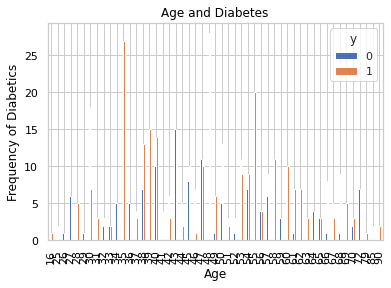

In [10]:
%matplotlib inline

# Use pandas to determine the type of table to display, providing an x and y axis
pd.crosstab(data.Age,data.y).plot(kind='bar')

# Plot the titles of the axis
plt.title('Age and Diabetes').set_color('black')

# Plot the x label
plt.xlabel('Age').set_color('black')

# Plot the y label
plt.ylabel('Frequency of Diabetics').set_color('black')

# Save the figure so you can reference it later
plt.savefig('diabetics_age')

# Change the colour of the axis line
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

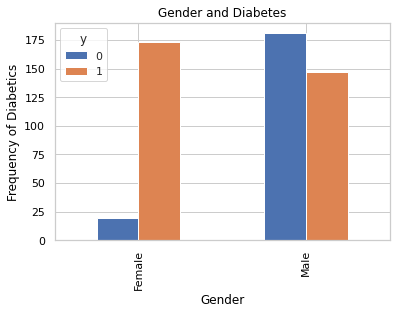

In [11]:
%matplotlib inline

# Gender
pd.crosstab(data.Gender,data.y).plot(kind='bar') 
plt.title('Gender and Diabetes').set_color('black') 
plt.xlabel('Gender').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_gender')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

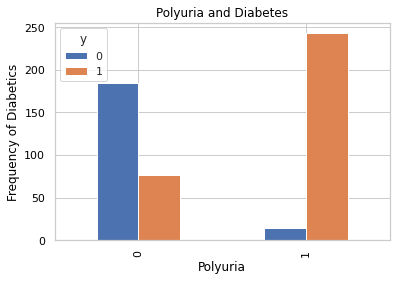

In [12]:
# Polyuria
pd.crosstab(data.Polyuria,data.y).plot(kind='bar') 
plt.title('Polyuria and Diabetes').set_color('black') 
plt.xlabel('Polyuria').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_Polyuria')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

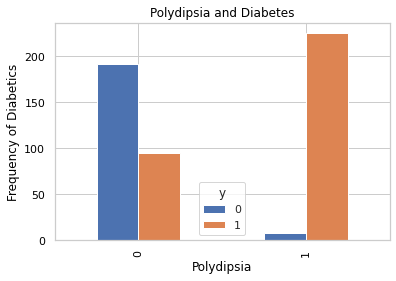

In [13]:
# Polydipsia
pd.crosstab(data.Polydipsia,data.y).plot(kind='bar') 
plt.title('Polydipsia and Diabetes').set_color('black') 
plt.xlabel('Polydipsia').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_Polydipsia')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

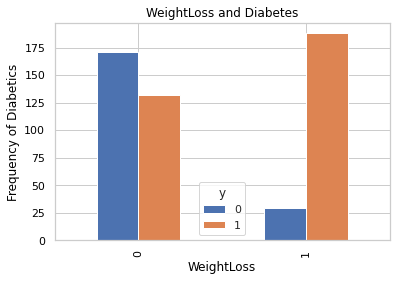

In [14]:
# WeightLoss
pd.crosstab(data.WeightLoss,data.y).plot(kind='bar') 
plt.title('WeightLoss and Diabetes').set_color('black') 
plt.xlabel('WeightLoss').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_WeightLoss')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

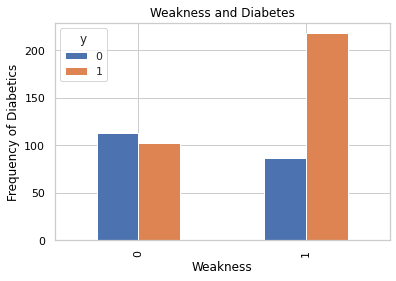

In [15]:
# Weakness
pd.crosstab(data.weakness,data.y).plot(kind='bar') 
plt.title('Weakness and Diabetes').set_color('black') 
plt.xlabel('Weakness').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_weakness')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

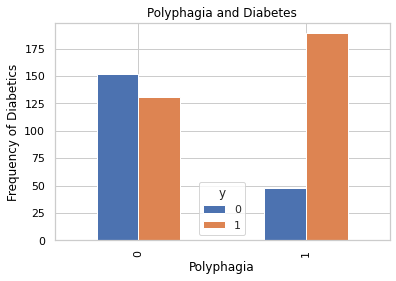

In [16]:
# Polyphagia
pd.crosstab(data.Polyphagia,data.y).plot(kind='bar') 
plt.title('Polyphagia and Diabetes').set_color('black') 
plt.xlabel('Polyphagia').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_Polyphagia')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

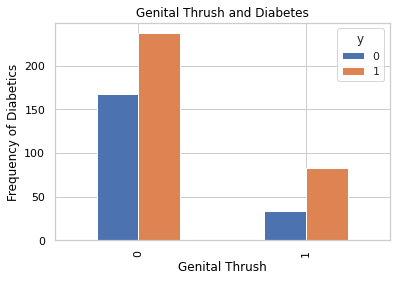

In [17]:
# Genital Thrush
pd.crosstab(data.GenitalThrush,data.y).plot(kind='bar') 
plt.title('Genital Thrush and Diabetes').set_color('black') 
plt.xlabel('Genital Thrush').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_GenitalThrush')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

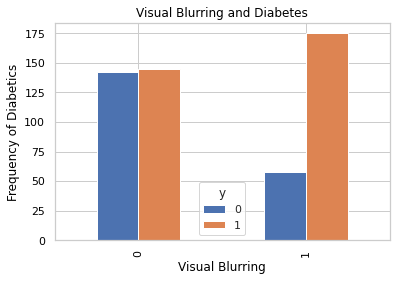

In [18]:
# VisualBlurring
pd.crosstab(data.VisualBlurring,data.y).plot(kind='bar') 
plt.title('Visual Blurring and Diabetes').set_color('black') 
plt.xlabel('Visual Blurring').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_VisualBlurring')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

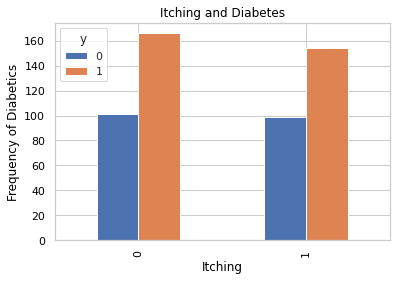

In [19]:
# Itching
pd.crosstab(data.Itching,data.y).plot(kind='bar') 
plt.title('Itching and Diabetes').set_color('black') 
plt.xlabel('Itching').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_Itching')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

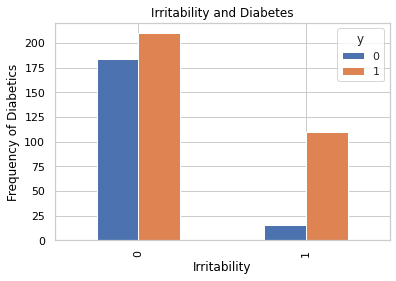

In [20]:
# Irritability
pd.crosstab(data.Irritability,data.y).plot(kind='bar') 
plt.title('Irritability and Diabetes').set_color('black') 
plt.xlabel('Irritability').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_Irritability')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

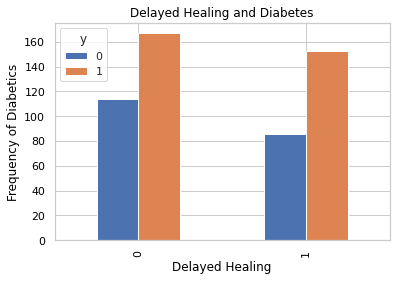

In [21]:
# Delayed Healing
pd.crosstab(data.DelayedHealing,data.y).plot(kind='bar') 
plt.title('Delayed Healing and Diabetes').set_color('black') 
plt.xlabel('Delayed Healing').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_DelayedHealing')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

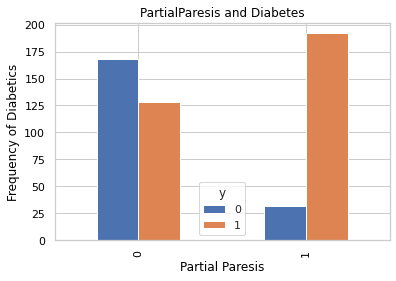

In [22]:
# PartialParesis
pd.crosstab(data.PartialParesis,data.y).plot(kind='bar') 
plt.title('PartialParesis and Diabetes').set_color('black') 
plt.xlabel('Partial Paresis').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_PartialParesis')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

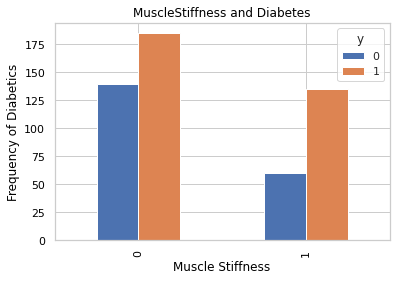

In [23]:
# MuscleStiffness
pd.crosstab(data.MuscleStiffness,data.y).plot(kind='bar') 
plt.title('MuscleStiffness and Diabetes').set_color('black') 
plt.xlabel('Muscle Stiffness').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_MuscleStiffness')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

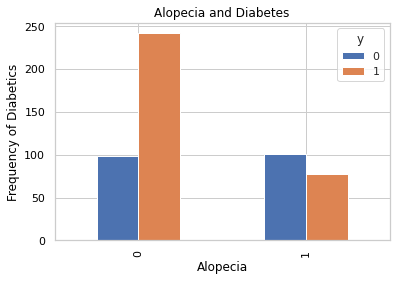

In [24]:
# Alopecia
pd.crosstab(data.Alopecia,data.y).plot(kind='bar') 
plt.title('Alopecia and Diabetes').set_color('black') 
plt.xlabel('Alopecia').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_Alopecia')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

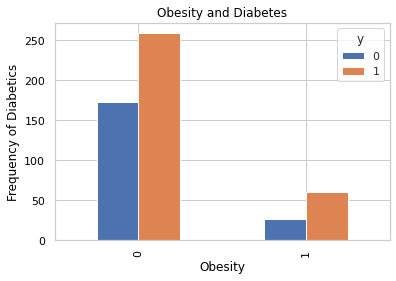

In [25]:
# Obesity
pd.crosstab(data.Obesity,data.y).plot(kind='bar') 
plt.title('Obesity and Diabetes').set_color('black') 
plt.xlabel('Obesity').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_Obesity')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

### Insight

Alot of the symptoms, on their own, are not good indicators of whether someone has diabetes or not. Take 'Age' for example. Age is not a good indicator, too many categories, maybe join to age groups?
Polyuria seems to be a good indicator. The left two bar charts show that, for none-diabetics about double showed no indication of having Polyuria whilst diabetics a great number of them had Polyuria.
Likewise, Polydipsia shows a similar divide thus both are good indicators of diabetes.


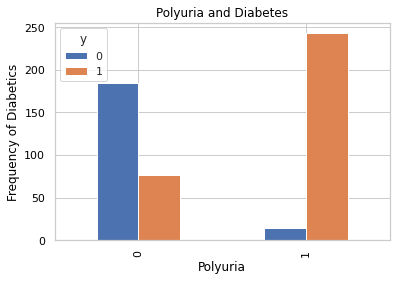

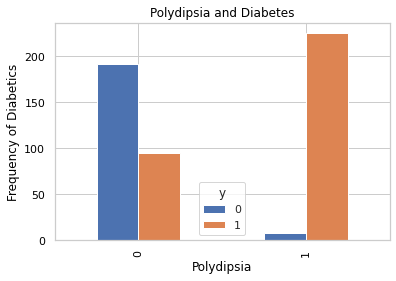

In [26]:
# Polyuria
pd.crosstab(data.Polyuria,data.y).plot(kind='bar') 
plt.title('Polyuria and Diabetes').set_color('black') 
plt.xlabel('Polyuria').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_Polyuria')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

# Polydipsia
pd.crosstab(data.Polydipsia,data.y).plot(kind='bar') 
plt.title('Polydipsia and Diabetes').set_color('black') 
plt.xlabel('Polydipsia').set_color('black') 
plt.ylabel('Frequency of Diabetics').set_color('black')
plt.savefig('diabetics_Polydipsia')
#plt.axhline(color='white') change colour of the axis line
plt.tick_params(axis='x', colors='black') 
plt.tick_params(axis='y', colors='black')

The initial visualization I chose for age wasn't great, so i'm going to produce a clearer visualation using a histogram to see what insight I can gain from it.

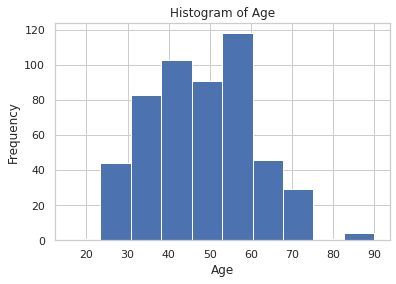

In [27]:
data.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

### Insight

I can see most diabetics are in the age range 40 - 60

### Create dummy variables to fix Data Imbalance

Because we have now identified Polyuria and Polydipsia as clear indicators of diabetes, we can trust these features are good enough to use for creating dummy variables to fix the Data imbalance. We needed to check so our data isn't biases or because invalid, by making a full assumption to add more information to the data.

In [28]:
category_vars = ['Polyuria','Polydipsia']

for var in category_vars:
    category_list='var'+'_'+var
    category_list = pd.get_dummies(data[var], prefix=var)
    new_data=data.join(category_list)
    data=new_data

data_vars=data.columns.values.tolist()

# We don't want to alter the other categories
to_keep=[i for i in data_vars if i not in category_vars]

data_final=data[to_keep]

# You will see new columns have been added to our dataset, repeats of Polyuria and Polydipsia data
data_final.columns.values

array(['Age', 'Gender', 'WeightLoss', 'weakness', 'Polyphagia',
       'GenitalThrush', 'VisualBlurring', 'Itching', 'Irritability',
       'DelayedHealing', 'PartialParesis', 'MuscleStiffness', 'Alopecia',
       'Obesity', 'y', 'Polyuria_0', 'Polyuria_1', 'Polydipsia_0',
       'Polydipsia_1'], dtype=object)

In [29]:
# Output data just to see what it looks like with the added dummy variables
data.head()

,Age,Gender,Polyuria,Polydipsia,WeightLoss,weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,...,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,y,Polyuria_0,Polyuria_1,Polydipsia_0,Polydipsia_1
0,40,Male,0,1,0,1,0,0,0,1,...,1,0,1,1,1,1,1,0,0,1
1,58,Male,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
2,41,Male,1,0,0,1,1,0,0,1,...,1,0,1,1,0,1,0,1,1,0
3,45,Male,0,0,1,1,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
4,60,Male,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,0,1


In [30]:
data.tail()

,Age,Gender,Polyuria,Polydipsia,WeightLoss,weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,...,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,y,Polyuria_0,Polyuria_1,Polydipsia_0,Polydipsia_1
515,39,Female,1,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,1,0,1
516,48,Female,1,1,1,1,1,0,0,1,...,1,1,0,0,0,1,0,1,0,1
517,58,Female,1,1,1,1,1,0,1,0,...,0,1,1,0,1,1,0,1,0,1
518,32,Female,0,0,0,1,0,0,1,1,...,1,0,0,1,0,0,1,0,1,0
519,42,Male,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### Insight

There is still a problem with our data. We need all values to be numerical so we can apply our logistic regression algorithm to it. So we need to change Female and Male to be binary.
- Femal -> 1 and Male -> 0

In [31]:
data_final.replace('Female', 1, inplace=True)
data_final.replace('Male', 0, inplace=True)

# can compare with the table above to see the change
data_final.tail()

/home/muna/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Age,Gender,WeightLoss,weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,y,Polyuria_0,Polyuria_1,Polydipsia_0,Polydipsia_1
515,39,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1
516,48,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,1,0,1
517,58,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0,1,0,1
518,32,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0
519,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Oversample data using SMOTE

__Why must I oversample the data and what is SMOTE?__

_Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance._

_The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important._

_One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short._

__The breakdown:__
So essentially python has a library specific for dealing with imbalanced data, and SMOTE is a method that lets you fix this! 

Source:
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [36]:
# the rest of the columns
X = data_final.loc[:, data_final.columns != 'y']

# minority class
y = data_final.loc[:, data_final.columns == 'y']

# os for the operation in use
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

# This is where the data is split
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# can now check the imbalance has been fixed
print("length of oversampled data is ",len(os_data_X))
print("Number of none diabetics in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of diabetics",len(os_data_y[os_data_y['y']==1]))
print("Proportion of none diabetics data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of diabetics data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  452
Number of none diabetics in oversampled data 226
Number of diabetics 226
Proportion of none diabetics data in oversampled data is  0.5
Proportion of diabetics data in oversampled data is  0.5


### Insight

Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

### Recursive Feature Elimination

_RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable._

_There are two important configuration options when using RFE: the choice in the number of features to select and the choice of the algorithm used to help choose features. Both of these hyperparameters can be explored, although the performance of the method is not strongly dependent on these hyperparameters being configured well._

__The breakdown__:
The goal of RFE is to select features by recursively considering smaller and smaller sets of features based on the idea of repeatedly constructing a model and choosing either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. We need to use it alongside our regression model for classification.

Source:
https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [38]:
data_final_vars=data_final.columns.values.tolist()

y=['y']
X=[i for i in data_final_vars if i not in y]

# using logistic regression here, set max iterations to 10000 to limit the amount it recurses
logreg = LogisticRegression(max_iter=10000) 
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

print(rfe.support_)

print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/home/muna/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


### Insight

RFE has helped us choose the following columns, where all the values are True or 1 are the following columns. It also removes Polyuria and Polydipsia.

In [39]:
print(data.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'WeightLoss', 'weakness',
       'Polyphagia', 'GenitalThrush', 'VisualBlurring', 'Itching',
       'Irritability', 'DelayedHealing', 'PartialParesis', 'MuscleStiffness',
       'Alopecia', 'Obesity', 'y', 'Polyuria_0', 'Polyuria_1', 'Polydipsia_0',
       'Polydipsia_1'],
      dtype='object')


In [40]:
cols=['Age', 'Gender', 'WeightLoss', 'weakness',
       'Polyphagia', 'GenitalThrush', 'VisualBlurring', 'Itching',
       'Irritability', 'DelayedHealing', 'PartialParesis', 'MuscleStiffness',
       'Alopecia', 'Obesity','Polyuria_0', 'Polyuria_1','Polydipsia_0',
       'Polydipsia_1'] 

X=os_data_X[cols]
y=os_data_y['y']

### Implementing the model


In [45]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.143818
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.793     
Dependent Variable: y                AIC:              166.0111  
Date:               2021-02-05 09:07 BIC:              240.0573  
No. Observations:   452              Log-Likelihood:   -65.006   
Df Model:           17               LL-Null:          -313.30   
Df Residuals:       434              LLR p-value:      9.8706e-95
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Age               -0.0579   0.0276 -2.0999 0.0357 -0.1119 -0.0039
Gender             4.8246   0.7154  6.7436 0.0000  3.4224  6.2268

### Insight

- Results Logit:
- Coef.:
- Std.Err:
- z:
- P>|z|:
- [0.025 0.975]

Source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
